# Scenario:

Based on topics/keywords of interest and the user's budget, the system recommends 7 games available on GameStop. The user can also decide whether pre-owned games should be considered or not.

## Model

Uses *Sentence-BERT (SBERT)*,  a modification of the BERT network using siamese and triplet networks that is able to derive semantically meaningful sentence embeddings. This allows more efficient semantic search, which is utilized in the following application. 

The siamese network architecture enables that fixed-sized vectors for input sentences can be derived. Using a similarity measure like cosine similarity or Manhatten / Euclidean distance, semantically similar sentences can be found. Cosine similarity is used in this work.

SBERT fine tuned on NLI data which creates SOTA sentence embeddings, as reported in the [SBERT paper](https://arxiv.org/pdf/1908.10084.pdf).

<p style="text-align: center;">SBERT Framework example</p>


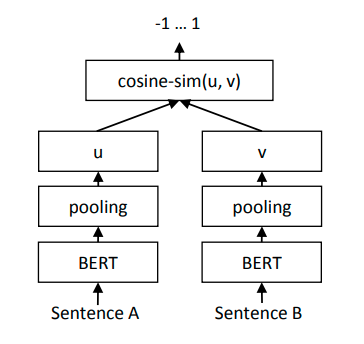

In [7]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
import scipy.spatial
import numpy as np

In [5]:
price_title = pd.read_csv('prices_title.csv', index_col=[0])

In [8]:
x1 = pd.read_csv('smaller.csv', index_col=False)
x2 = pd.read_csv('smaller_1.csv',index_col=False)
x3 = pd.read_csv('smaller_2.csv',index_col=False)
vertical_stack = pd.concat([x1,x2,x3], axis=0, ignore_index=True)
price_cleaned = vertical_stack.dropna(subset=['price'])
comp_desc = price_cleaned[(price_cleaned['long'].notnull())]
comp_desc['complete_desc'] = comp_desc['short'].str.cat(comp_desc['long'], sep =" ")
descriptions = comp_desc.complete_desc.values

/home/armaan/.virtualenvs/lid/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
short_desc = vertical_stack[(vertical_stack['short'].notnull())]
short_desc.long.replace(np.nan, '', regex=True, inplace=True)
short_desc['complete_desc'] = short_desc['title'].str.cat(short_desc['short'].str.cat(short_desc['long'], sep =" "), sep=': ')

/home/armaan/.virtualenvs/lid/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/armaan/.virtualenvs/lid/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
short_desc.shape

(1041, 5)

In [11]:
total_df = pd.merge(short_desc, price_title, on='title')

In [12]:
total_df.shape

(1041, 8)

In [13]:
total_df.head(20)

,long,price,short,title,complete_desc,digital,new,pre
0,,PRE-OWNED\n$9.99,Step into the boots of Grayson Hunt after a cr...,Bulletstorm: Full Clip Edition,Bulletstorm: Full Clip Edition: Step into the ...,NaN,NaN,$9.99
1,Strap-in and put the pedal to the floor cause ...,NEW\n$39.99PRE-OWNED\n$34.99,Fasten your seat belts and take a ride inside ...,Street Outlaws: The List,Street Outlaws: The List: Fasten your seat bel...,NaN,$39.99,$34.99
2,,NEW\n$19.99PRE-OWNED\n$14.99\n$9.99,Mega Man returns! The newest entry in this ico...,Mega Man 11,Mega Man 11: Mega Man returns! The newest entr...,NaN,$19.99,$9.99
3,,NEW\n$39.99PRE-OWNED\n$34.99,Experience pure sniper gameplay across the har...,Sniper Ghost Warrior Contracts,Sniper Ghost Warrior Contracts: Experience pur...,NaN,$39.99,$34.99
4,,PRE-OWNED\n$39.99,All of the girls in school are showing signs o...,Gal Gun 2,Gal Gun 2: All of the girls in school are show...,NaN,NaN,$39.99
5,,PRE-OWNED\n$29.99,Project CARS 2 is the next evolution in the aw...,Project Cars 2,Project Cars 2: Project CARS 2 is the next evo...,NaN,NaN,$29.99
6,,NEW\n$13.97PRE-OWNED\n$9.99,Achieve your gridiron greatness in Madden NFL ...,Madden NFL 19,Madden NFL 19: Achieve your gridiron greatness...,NaN,$13.97,$9.99
7,,PRE-OWNED\n$19.99,Heavy Rain & Beyond:Two Souls in a 2 disc coll...,Heavy Rain and BEYOND: Two Souls,Heavy Rain and BEYOND: Two Souls: Heavy Rain &...,NaN,NaN,$19.99
8,GAME MODES:\nClassic: Perform Solo or together...,NEW\n$24.99\n$9.99PRE-OWNED\n$19.99\n$7.99,Ready to start the party in your living room? ...,Let's Sing Country,Let's Sing Country: Ready to start the party i...,NaN,$9.99,$7.99
9,,PRE-OWNED\n$9.99,The Book of Unwritten Tales 2 follows a band o...,The Book of Unwritten Tales 2,The Book of Unwritten Tales 2: The Book of Unw...,NaN,NaN,$9.99


In [4]:
!pip install sentence_transformers

  Using cached sentence-transformers-0.2.6.1.tar.gz (55 kB)
     |████████████████████████████████| 674 kB 167 kB/s eta 0:00:01
     |████████████████████████████████| 752.0 MB 1.0 kB/s eta 0:00:010   |█▊                              | 41.2 MB 4.8 MB/s eta 0:02:29     |███                             | 70.3 MB 581 kB/s eta 0:19:32     |████▉                           | 113.0 MB 548 kB/s eta 0:19:26     |██████▍                         | 148.9 MB 99 kB/s eta 1:41:23     |███████████████████▏            | 450.7 MB 153 kB/s eta 0:32:49     |████████████████████▊           | 486.2 MB 703 kB/s eta 0:06:19     |██████████████████████████      | 608.6 MB 266 kB/s eta 0:08:58     |███████████████████████████▏    | 639.7 MB 83 kB/s eta 0:22:29     |██████████████████████████████▏ | 707.9 MB 635 kB/s eta 0:01:10
  Using cached nltk-3.5.zip (1.4 MB)
     |████████████████████████████████| 3.8 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 112 kB/s eta 0:00:01
     |███████

In [10]:
!pip install tqdm==4.27

     |████████████████████████████████| 44 kB 47 kB/s eta 0:00:011
ERROR: lyft-dataset-sdk 0.0.8 has requirement opencv-python>=3.4.2.17, but you'll have opencv-python 3.4.2.16 which is incompatible.
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.23.4
    Uninstalling tqdm-4.23.4:
      Successfully uninstalled tqdm-4.23.4
You should consider upgrading via the '/home/armaan/.virtualenvs/lid/bin/python3.6 -m pip install --upgrade pip' command.


### Model Selection

The semantic search is done using a BERT base model (12 layers) fine tuned on the NLI dataset with mean pooling strategy. This particular model has attained very close to SOTA results on STS (Semantic Textual Similarity) benchmark dataset, as specified in the SBERT paper.

#### Model Comparison

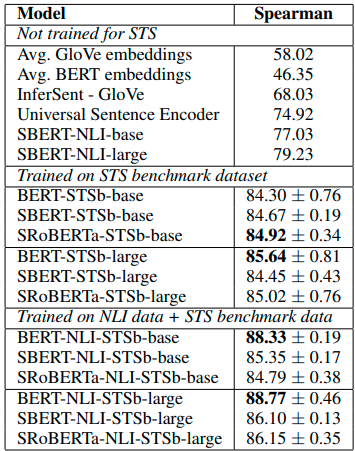

In [3]:
embedder = SentenceTransformer('bert-base-nli-mean-tokens')

In [14]:
cols = ["pre","digital","new"]

In [15]:
total_df['new'] = total_df['new'].replace('[\$,]', '', regex=True).str.split().str[-1].astype(float)
total_df['pre'] = total_df['pre'].replace('[\$,]', '', regex=True).str.split().str[-1].astype(float)
total_df['digital'] = total_df['digital'].replace('[\$,]', '', regex=True).str.split().str[-1].astype(float)

In [23]:
total_df[cols] = total_df[cols].astype(float)
total_df[cols] = total_df[cols].replace({np.nan:'10000', np.nan:'10000'})
total_df.head(30)

,long,price,short,title,complete_desc,digital,new,pre
0,,PRE-OWNED\n$9.99,Step into the boots of Grayson Hunt after a cr...,Bulletstorm: Full Clip Edition,Bulletstorm: Full Clip Edition: Step into the ...,10000.00,10000.00,9.99
1,Strap-in and put the pedal to the floor cause ...,NEW\n$39.99PRE-OWNED\n$34.99,Fasten your seat belts and take a ride inside ...,Street Outlaws: The List,Street Outlaws: The List: Fasten your seat bel...,10000.00,39.99,34.99
2,,NEW\n$19.99PRE-OWNED\n$14.99\n$9.99,Mega Man returns! The newest entry in this ico...,Mega Man 11,Mega Man 11: Mega Man returns! The newest entr...,10000.00,19.99,9.99
3,,NEW\n$39.99PRE-OWNED\n$34.99,Experience pure sniper gameplay across the har...,Sniper Ghost Warrior Contracts,Sniper Ghost Warrior Contracts: Experience pur...,10000.00,39.99,34.99
4,,PRE-OWNED\n$39.99,All of the girls in school are showing signs o...,Gal Gun 2,Gal Gun 2: All of the girls in school are show...,10000.00,10000.00,39.99
5,,PRE-OWNED\n$29.99,Project CARS 2 is the next evolution in the aw...,Project Cars 2,Project Cars 2: Project CARS 2 is the next evo...,10000.00,10000.00,29.99
6,,NEW\n$13.97PRE-OWNED\n$9.99,Achieve your gridiron greatness in Madden NFL ...,Madden NFL 19,Madden NFL 19: Achieve your gridiron greatness...,10000.00,13.97,9.99
7,,PRE-OWNED\n$19.99,Heavy Rain & Beyond:Two Souls in a 2 disc coll...,Heavy Rain and BEYOND: Two Souls,Heavy Rain and BEYOND: Two Souls: Heavy Rain &...,10000.00,10000.00,19.99
8,GAME MODES:\nClassic: Perform Solo or together...,NEW\n$24.99\n$9.99PRE-OWNED\n$19.99\n$7.99,Ready to start the party in your living room? ...,Let's Sing Country,Let's Sing Country: Ready to start the party i...,10000.00,9.99,7.99
9,,PRE-OWNED\n$9.99,The Book of Unwritten Tales 2 follows a band o...,The Book of Unwritten Tales 2,The Book of Unwritten Tales 2: The Book of Unw...,10000.00,10000.00,9.99


In [24]:
total_df.digital.dtype

dtype('float64')

In [17]:
short_desc.complete_desc.head()

0    Bulletstorm: Full Clip Edition: Step into the ...
1    Street Outlaws: The List: Fasten your seat bel...
2    Mega Man 11: Mega Man returns! The newest entr...
3    Sniper Ghost Warrior Contracts: Experience pur...
4    Gal Gun 2: All of the girls in school are show...
Name: complete_desc, dtype: object

In [545]:
descriptions = short_desc.complete_desc.values

In [546]:
descriptions = descriptions.tolist()

In [310]:
corpus_embeddings = embedder.encode(descriptions)

In [524]:
short_desc[short_desc['title'].str.lower().str.contains("fortnite")]

,long,price,short,title,complete_desc
883,"BATTLE. BUILD. CREATE. Fortnite is the free, a...",NEW\n$24.97,"Embrace your dark side, heat up the battle and...",Fortnite: Darkfire Bundle,Fortnite: Darkfire Bundle: Embrace your dark s...


### Corpus_embed function:

The function accepts budget and an option of whether the giftee is looking for new (and digital) games only. According to the budget, gets game descriptions to extract corpus embeddings. Runs query-wise semantic search on the corpus embeddings thus obtained.

In [18]:
def corpus_embed(data, budget=10000, new_only=False):
    if new_only:
        filtered = data[((data['new'] <= float(budget)) | (data['digital'] <= float(budget)))]
    else:    
        filtered = data[((data['pre'] <= float(budget)) | (data['new'] <= float(budget)) | (data['digital'] <= float(budget)))]
    
    descriptions = filtered.complete_desc.values.tolist()
    corpus_embeddings = embedder.encode(descriptions)
    
    return filtered, corpus_embeddings

### Specifications:

- Budget: Specify max budget in dollars.
- Setting new_only flag to 'True' will present games under the budget and available in new or digital format.
- Add queries describing gaming interest or giftee's preferred games.

In [34]:
new_df, corpus_embeddings_from_func = corpus_embed(total_df, budget = 50, new_only=False)

In [32]:
queries = ['Call of Duty: Modern Warfare Dark Edition Only at GameStop: Prepare to go dark with the Modern Warfare Dark Edition! The Dark Edition features functioning Night Vision Goggles that allow the user to see up to 20 meters in absolute darkness. Based off the in-game model, Infinity Ward has outfitted the adjustable goggles with game inspired custom decals and design details. The goggles can operate in “Day mode”, allowing the user to see in full color, and automatically switch to “Night mode” when dark conditions are detected. Night mode features both a black-and-white and a phosphorous blue color setting that the user can toggle between. Don’t be left in the dark, pre-order this limited edition while supplies last. Exclusive to GameStop, the Call of Duty®: Modern Warfare® Dark Edition includes:\nPHYSICAL ITEMS:\nCall of Duty: Modern Warfare game\nNight Vision Goggles\nDisplay Stand for Night Vision Goggles\nSteelbook\nDIGITAL IN-GAME ITEMS\nCustom In-game Tactical Knife\n“All Ghillied Up” Operator Pack\n“Crew Expendable” Operator Pack\n“War Pig” Operator Pack\nCall of Duty Endowment (C.O.D.E.) Animated Calling Card\nEach Operator Pack includes a themed Operator skin, cosmetic weapon variant, and additional bonus content.\nThe stakes have never been higher as players take on the role of lethal Tier One operators in a heart-racing saga that will affect the global balance of power. Call of Duty: Modern Warfare engulfs fans in an incredibly raw, gritty, provocative narrative that brings unrivaled intensity and shines a light on the changing nature of modern war. Developed by the studio that started it all, Infinity Ward delivers an epic reimagining of the iconic Modern Warfare series from the ground up.\nIn the visceral and dramatic single-player story campaign, Call of Duty: Modern Warfare pushes boundaries and breaks rules the way only Modern Warfare can. Players will engage in breathtaking covert operations alongside a diverse cast of international special forces and freedom fighters throughout iconic European cities and volatile expanses of the Middle East.\nAnd the story doesn’t end there.\nIn Call of Duty: Modern Warfare, players will be thrust into an immersive narrative spanning the entire game. Experience the ultimate online playground with classic multiplayer, or squad-up and play cooperatively in a collection of elite operations accessible to all skill levels.'
, 'killing zombies','detective mystery', 'sword medeival action', 'dragons fire and fantasy','war fire guns action', 'stealth thief','home life family']
query_embeddings = embedder.encode(queries)

### Results:

Results are presented based on the queries defined above. The queries seek to capture game similarity in terms of genre, story and gameplay as those seem to be primary factors gamers rely on. The results show games sorted in order of most relevant based on description to least relevant (top 7).

In [27]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [35]:
#### TESTER BLOCK FOR FUNC CORPUS_EMBED

closest_n = 7
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings_from_func, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 7 most similar game descriptions in corpus:")

    for idx, distance in results[0:closest_n]:
        print("Here's the INDEX:", idx)
#         print('GAME-TITLE: ', data_wprice['title'].iloc[idx])

        print('GAME-TITLE: {}\n Price: New: {} \t Pre: {}\t Digital: {}\n Similarity Score: {} '.format(new_df['title'].iloc[idx], new_df['new'].iloc[idx], new_df['pre'].iloc[idx], new_df['digital'].iloc[idx],(1-distance)))
#         print(short_desc.complete_desc.iloc[idx].strip(), "(Score: %.4f)" % (1-distance))
#         print(descriptions[idx].strip(), "(Score: %.4f)" % (1-distance))
        print("*************\n")





Query: Call of Duty: Modern Warfare Dark Edition Only at GameStop: Prepare to go dark with the Modern Warfare Dark Edition! The Dark Edition features functioning Night Vision Goggles that allow the user to see up to 20 meters in absolute darkness. Based off the in-game model, Infinity Ward has outfitted the adjustable goggles with game inspired custom decals and design details. The goggles can operate in “Day mode”, allowing the user to see in full color, and automatically switch to “Night mode” when dark conditions are detected. Night mode features both a black-and-white and a phosphorous blue color setting that the user can toggle between. Don’t be left in the dark, pre-order this limited edition while supplies last. Exclusive to GameStop, the Call of Duty®: Modern Warfare® Dark Edition includes:
PHYSICAL ITEMS:
Call of Duty: Modern Warfare game
Night Vision Goggles
Display Stand for Night Vision Goggles
Steelbook
DIGITAL IN-GAME ITEMS
Custom In-game Tactical Knife
“All Ghillied 